In [60]:
seasons = list(range(2000,2022))

In [61]:
url_main = "https://www.basketball-reference.com/awards/awards_{}.html"

In [62]:
import requests

for season in seasons:
    url = url_main.format(season)
    data = requests.get(url)
    
    with open("ROTY/{}.html".format(season), "w+", encoding="utf-8") as f: 
            f.write(data.text)
   

In [63]:
from bs4 import BeautifulSoup

In [65]:
with open("ROTY/2000.html" , encoding ="utf-8") as f:
    page = f.read()


In [77]:
soup = BeautifulSoup(page, "html.parser")

In [83]:
soup.find('tr', class_="over_header").decompose()

In [79]:
roy_table = soup.find(id="roy")

In [80]:
import pandas as pd

In [84]:
roy_2000 = pd.read_html(str(roy_table))[0]

In [85]:
roy_2000

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1T,Elton Brand,20,CHI,58.0,58.0,121,0.479,81,37.0,20.1,10.0,1.9,0.8,1.6,0.482,0.000,0.685,7.5,0.121
1,1T,Steve Francis,22,HOU,58.0,58.0,121,0.479,77,36.1,18.0,5.3,6.6,1.5,0.4,0.445,0.345,0.786,6.4,0.111
2,3,Lamar Odom,20,LAC,3.0,3.0,121,0.025,76,36.4,16.6,7.8,4.2,1.2,1.3,0.438,0.360,0.719,3.2,0.055
3,4,Andre Miller,23,CLE,2.0,2.0,121,0.017,82,25.5,11.1,3.4,5.8,1.0,0.2,0.449,0.204,0.774,5.3,0.122


In [98]:
dfs = []

for season in seasons:
    with open("ROTY/{}.html".format(season), encoding="utf-8") as f:
        page = f.read()
        
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    roy_table = soup.find(id="roy")
    roy = pd.read_html(str(roy_table))[0]
    roy["Season"] = season
   
    dfs.append(roy)

    

In [99]:
rotys= pd.concat(dfs)

In [100]:
rotys.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                Rank             Player                Age                 Tm   
0                 1T        Elton Brand                 20                CHI   
1                 1T      Steve Francis                 22                HOU   
2                  3         Lamar Odom                 20                LAC   
3                  4       Andre Miller                 23                CLE   
0                  1        Mike Miller                 20                ORL   

  Voting                        Unnamed: 8_level_0 Per Game  ...             \
   First Pts Won Pts Max  Share                  G       MP  ...   TRB  AST   
0   58.0    58.0     121  0.479                 81     37.0  ...  10.0  1.9   
1   58.0    58.0     121  0.479                 77     36.1  ...   5.3  6.6   
2    3.0     3.0     121  0.025                 76     36.4  ...   7.8  4.2   
3    2.0     2.0     121  0.017                 82     25.5  ...   3.4  5.8   
0   75.0    75.0     124  0.605                 82     29.1  ...   4.0  1.7   

            Shooting               Advanced        Season  
   STL  BLK      FG%    3P%    FT%       WS  WS/48         
0  0.8  1.6    0.482  0.000  0.685      7.5  0.121   2000  
1  1.5  0.4    0.445  0.345  0.786      6.4  0.111   2000  
2  1.2  1.3    0.438  0.360  0.719      3.2  0.055   2000  
3  1.0  0.2    0.449  0.204  0.774      5.3  0.122   2000  
0  0.6  0.2    0.436  0.407  0.711      5.3  0.106   2001  

[5 rows x 21 columns]

In [101]:
rotys.to_csv("rotys.csv")

In [107]:
roty = pd.read_csv("rotys.csv")

In [108]:
roty

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Season
0,0,1T,Elton Brand,20,CHI,58,58,121,0.479,81,...,10.0,1.9,0.8,1.6,0.482,0.000,0.685,7.5,0.121,2000
1,1,1T,Steve Francis,22,HOU,58,58,121,0.479,77,...,5.3,6.6,1.5,0.4,0.445,0.345,0.786,6.4,0.111,2000
2,2,3,Lamar Odom,20,LAC,3,3,121,0.025,76,...,7.8,4.2,1.2,1.3,0.438,0.360,0.719,3.2,0.055,2000
3,3,4,Andre Miller,23,CLE,2,2,121,0.017,82,...,3.4,5.8,1.0,0.2,0.449,0.204,0.774,5.3,0.122,2000
4,0,1,Mike Miller,20,ORL,75,75,124,0.605,82,...,4.0,1.7,0.6,0.2,0.436,0.407,0.711,5.3,0.106,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,7,8,RJ Barrett,19,NYK,0,1,500,0.002,56,...,5.0,2.6,1.0,0.3,0.402,0.320,0.614,-0.5,-0.015,2020
167,0,1,LaMelo Ball,19,CHO,84,465,495,0.939,51,...,5.9,6.1,1.6,0.4,0.436,0.352,0.758,2.8,0.093,2021
168,1,2,Anthony Edwards,19,MIN,15,309,495,0.624,72,...,4.7,2.9,1.1,0.5,0.417,0.329,0.776,0.8,0.017,2021
169,2,3,Tyrese Haliburton,20,SAC,0,114,495,0.230,58,...,3.0,5.3,1.3,0.5,0.472,0.409,0.857,3.5,0.096,2021


In [109]:
del roty["Unnamed: 0"]

In [162]:
roty.to_csv("ROTY.csv")

In [117]:
rookie_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_rookies.html"

url = rookie_stats_url.format(2000)
data = requests.get(url)
with open("Rookie-Stats/2000.html".format(season), "w+",  encoding="utf-8") as f:
        f.write(data.text)

In [118]:
from selenium import webdriver

In [119]:
driver = webdriver.Chrome(executable_path="/Users/shid/chromedriver")

In [120]:
import time

season = 2000
url = rookie_stats_url.format(season)
driver.get(url)
driver.execute_script("window.scrollTo(1,10000)")
time.sleep(2)

html = driver.page_source

'<html data-version="klecko-" data-root="/home/bbr/build" lang="en" class=" js cookies localstorage sessionstorage cors history csspositionsticky no-touchevents pointerevents matchmedia flexwrap desktop is_live" style=""><head><script type="text/javascript" async="" src="https://static.criteo.net/js/ld/publishertag.prebid.117.js"></script><script src="https://tagan.adlightning.com/freestar/bl-b318b8b-21bfde11.js" type="text/javascript" defer=""></script><script src="https://tagan.adlightning.com/freestar/b-c5c1c29-92bdb962.js" type="text/javascript" defer=""></script><script type="text/javascript"></script>\n    <script type="text/javascript" async="" src="https://snap.licdn.com/li.lms-analytics/insight.min.js"></script><script src="https://connect.facebook.net/signals/config/929333651348838?v=2.9.59&amp;r=stable" async=""></script><script src="https://connect.facebook.net/signals/plugins/identity.js?v=2.9.59" async=""></script><script async="" src="https://connect.facebook.net/en_US/f
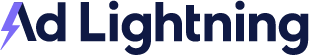

In [121]:
html

In [122]:
with open("Rookie-Stats/2000.html".format(season), "w+",  encoding="utf-8") as f:
        f.write(html)

In [123]:
for season in seasons:
    url = rookie_stats_url.format(season)
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    html = driver.page_source
    with open("Rookie-Stats/{}.html".format(season), "w+",  encoding="utf-8") as f:
        f.write(html)

In [133]:
df = []
for season in seasons:
    with open("Rookie-Stats/{}.html".format(season), encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    rookie_table = soup.find_all(id="rookies")[0]
    rookie_df = pd.read_html(str(rookie_table))[0]
    rookie_df["Season"] = season
    df.append(rookie_df)

In [134]:
rookies = pd.concat(df)

In [135]:
rookies

Unnamed: 0_level_0 Unnamed: 1_level_0        Unnamed: 2_level_0  \
                    Rk             Player                     Debut   
0                    1       Rafer Alston  Feb 17, '00, MIL vs. IND   
1                    2      Chucky Atkins     Nov 2, '99, ORL @ CHH   
2                    3      William Avery  Nov 13, '99, MIN vs. PHO   
3                    4    Jonathan Bender  Dec 10, '99, IND vs. CLE   
4                    5       Calvin Booth    Mar 25, '00, WAS @ DAL   
..                 ...                ...                       ...   
96                  90   Patrick Williams  Dec 23, '20, CHI vs. ATL   
97                  91      Dylan Windler  Dec 23, '20, CLE vs. CHO   
98                  92    Cassius Winston  Jan 11, '21, WAS vs. PHO   
99                  93      James Wiseman    Dec 22, '20, GSW @ BRK   
100                 94  Robert Woodard II  Dec 27, '20, SAC vs. PHO   

    Unnamed: 3_level_0 Unnamed: 4_level_0 Totals                          ...  \
                   Age                Yrs      G     MP    FG   FGA   3P  ...   
0                   23                 11    671  19392  2450  6391  996  ...   
1                   25                 11    696  17304  2479  6022  934  ...   
2                   20                  3    142   1205   137   415   40  ...   
3                   19                  8    262   3847   509  1221  101  ...   
4                   23                 10    366   4477   472  1047    2  ...   
..                 ...                ...    ...    ...   ...   ...  ...  ...   
96                  19                  2     88   2405   309   630   69  ...   
97                  24                  2     81    972    94   228   47  ...   
98                  22                  2     29    137    18    44   10  ...   
99                  19                  1     39    836   191   368   12  ...   
100                 21                  2     25     87    10    36    2  ...   

                Shooting             Per Game                 Season  
       PF   PTS      FG%   3P%   FT%       MP   PTS  TRB  AST         
0    1408  6799     .383  .354  .729     28.9  10.1  2.8  4.8   2000  
1    1284  6863     .412  .364  .772     24.9   9.9  1.7  3.4   2000  
2     125   379     .330  .255  .714      8.5   2.7  0.7  1.4   2000  
3     391  1453     .417  .340  .763     14.7   5.5  2.2  0.6   2000  
4     678  1190     .451  .222  .748     12.2   3.3  2.8  0.4   2000  
..    ...   ...      ...   ...   ...      ...   ...  ...  ...    ...  
96    154   808     .490  .413  .729     27.3   9.2  4.5  1.3   2021  
97     84   271     .412  .320  .800     12.0   3.3  2.4  0.8   2021  
98     17    55     .409  .435  .900      4.7   1.9  0.3  0.7   2021  
99    121   448     .519  .316  .628     21.4  11.5  5.8  0.7   2021  
100     7    27     .278  .200  .500      3.5   1.1  1.1  0.2   2021  

[1859 rows x 29 columns]

In [136]:
rookies.to_csv("Rookies.csv")

In [137]:
temp = pd.read_csv("Rookies.csv")

In [138]:
temp

,Unnamed: 0,Rk,Player,Debut,Age,Yrs,G,MP,FG,FGA,...,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Season
0,0,1,Rafer Alston,"Feb 17, '00, MIL vs. IND",23,11,671,19392,2450,6391,...,1408,6799,0.383,0.354,0.729,28.9,10.1,2.8,4.8,2000
1,1,2,Chucky Atkins,"Nov 2, '99, ORL @ CHH",25,11,696,17304,2479,6022,...,1284,6863,0.412,0.364,0.772,24.9,9.9,1.7,3.4,2000
2,2,3,William Avery,"Nov 13, '99, MIN vs. PHO",20,3,142,1205,137,415,...,125,379,0.33,0.255,0.714,8.5,2.7,0.7,1.4,2000
3,3,4,Jonathan Bender,"Dec 10, '99, IND vs. CLE",19,8,262,3847,509,1221,...,391,1453,0.417,0.34,0.763,14.7,5.5,2.2,0.6,2000
4,4,5,Calvin Booth,"Mar 25, '00, WAS @ DAL",23,10,366,4477,472,1047,...,678,1190,0.451,0.222,0.748,12.2,3.3,2.8,0.4,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,96,90,Patrick Williams,"Dec 23, '20, CHI vs. ATL",19,2,88,2405,309,630,...,154,808,0.49,0.413,0.729,27.3,9.2,4.5,1.3,2021
1855,97,91,Dylan Windler,"Dec 23, '20, CLE vs. CHO",24,2,81,972,94,228,...,84,271,0.412,0.32,0.8,12,3.3,2.4,0.8,2021
1856,98,92,Cassius Winston,"Jan 11, '21, WAS vs. PHO",22,2,29,137,18,44,...,17,55,0.409,0.435,0.9,4.7,1.9,0.3,0.7,2021
1857,99,93,James Wiseman,"Dec 22, '20, GSW @ BRK",19,1,39,836,191,368,...,121,448,0.519,0.316,0.628,21.4,11.5,5.8,0.7,2021


In [139]:
del temp["Unnamed: 0"]

In [140]:
temp

,Rk,Player,Debut,Age,Yrs,G,MP,FG,FGA,3P,...,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Season
0,1,Rafer Alston,"Feb 17, '00, MIL vs. IND",23,11,671,19392,2450,6391,996,...,1408,6799,0.383,0.354,0.729,28.9,10.1,2.8,4.8,2000
1,2,Chucky Atkins,"Nov 2, '99, ORL @ CHH",25,11,696,17304,2479,6022,934,...,1284,6863,0.412,0.364,0.772,24.9,9.9,1.7,3.4,2000
2,3,William Avery,"Nov 13, '99, MIN vs. PHO",20,3,142,1205,137,415,40,...,125,379,0.33,0.255,0.714,8.5,2.7,0.7,1.4,2000
3,4,Jonathan Bender,"Dec 10, '99, IND vs. CLE",19,8,262,3847,509,1221,101,...,391,1453,0.417,0.34,0.763,14.7,5.5,2.2,0.6,2000
4,5,Calvin Booth,"Mar 25, '00, WAS @ DAL",23,10,366,4477,472,1047,2,...,678,1190,0.451,0.222,0.748,12.2,3.3,2.8,0.4,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,90,Patrick Williams,"Dec 23, '20, CHI vs. ATL",19,2,88,2405,309,630,69,...,154,808,0.49,0.413,0.729,27.3,9.2,4.5,1.3,2021
1855,91,Dylan Windler,"Dec 23, '20, CLE vs. CHO",24,2,81,972,94,228,47,...,84,271,0.412,0.32,0.8,12,3.3,2.4,0.8,2021
1856,92,Cassius Winston,"Jan 11, '21, WAS vs. PHO",22,2,29,137,18,44,10,...,17,55,0.409,0.435,0.9,4.7,1.9,0.3,0.7,2021
1857,93,James Wiseman,"Dec 22, '20, GSW @ BRK",19,1,39,836,191,368,12,...,121,448,0.519,0.316,0.628,21.4,11.5,5.8,0.7,2021


In [143]:
temp.to_csv("Rookies.csv")

In [144]:
temp = pd.read_csv("Rookies.csv")

In [145]:
temp

,Unnamed: 0,Rk,Player,Debut,Age,Yrs,G,MP,FG,FGA,...,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Season
0,0,1,Rafer Alston,"Feb 17, '00, MIL vs. IND",23,11,671,19392,2450,6391,...,1408,6799,0.383,0.354,0.729,28.9,10.1,2.8,4.8,2000
1,1,2,Chucky Atkins,"Nov 2, '99, ORL @ CHH",25,11,696,17304,2479,6022,...,1284,6863,0.412,0.364,0.772,24.9,9.9,1.7,3.4,2000
2,2,3,William Avery,"Nov 13, '99, MIN vs. PHO",20,3,142,1205,137,415,...,125,379,0.33,0.255,0.714,8.5,2.7,0.7,1.4,2000
3,3,4,Jonathan Bender,"Dec 10, '99, IND vs. CLE",19,8,262,3847,509,1221,...,391,1453,0.417,0.34,0.763,14.7,5.5,2.2,0.6,2000
4,4,5,Calvin Booth,"Mar 25, '00, WAS @ DAL",23,10,366,4477,472,1047,...,678,1190,0.451,0.222,0.748,12.2,3.3,2.8,0.4,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,1854,90,Patrick Williams,"Dec 23, '20, CHI vs. ATL",19,2,88,2405,309,630,...,154,808,0.49,0.413,0.729,27.3,9.2,4.5,1.3,2021
1855,1855,91,Dylan Windler,"Dec 23, '20, CLE vs. CHO",24,2,81,972,94,228,...,84,271,0.412,0.32,0.8,12,3.3,2.4,0.8,2021
1856,1856,92,Cassius Winston,"Jan 11, '21, WAS vs. PHO",22,2,29,137,18,44,...,17,55,0.409,0.435,0.9,4.7,1.9,0.3,0.7,2021
1857,1857,93,James Wiseman,"Dec 22, '20, GSW @ BRK",19,1,39,836,191,368,...,121,448,0.519,0.316,0.628,21.4,11.5,5.8,0.7,2021


In [146]:
del temp["Unnamed: 0"]

In [154]:
 temp_1 = temp.drop(["Debut"], axis =1 )

In [155]:
temp_1

,Rk,Player,Age,Yrs,G,MP,FG,FGA,3P,3PA,...,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Season
0,1,Rafer Alston,23,11,671,19392,2450,6391,996,2815,...,1408,6799,0.383,0.354,0.729,28.9,10.1,2.8,4.8,2000
1,2,Chucky Atkins,25,11,696,17304,2479,6022,934,2565,...,1284,6863,0.412,0.364,0.772,24.9,9.9,1.7,3.4,2000
2,3,William Avery,20,3,142,1205,137,415,40,157,...,125,379,0.33,0.255,0.714,8.5,2.7,0.7,1.4,2000
3,4,Jonathan Bender,19,8,262,3847,509,1221,101,297,...,391,1453,0.417,0.34,0.763,14.7,5.5,2.2,0.6,2000
4,5,Calvin Booth,23,10,366,4477,472,1047,2,9,...,678,1190,0.451,0.222,0.748,12.2,3.3,2.8,0.4,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,90,Patrick Williams,19,2,88,2405,309,630,69,167,...,154,808,0.49,0.413,0.729,27.3,9.2,4.5,1.3,2021
1855,91,Dylan Windler,24,2,81,972,94,228,47,147,...,84,271,0.412,0.32,0.8,12,3.3,2.4,0.8,2021
1856,92,Cassius Winston,22,2,29,137,18,44,10,23,...,17,55,0.409,0.435,0.9,4.7,1.9,0.3,0.7,2021
1857,93,James Wiseman,19,1,39,836,191,368,12,38,...,121,448,0.519,0.316,0.628,21.4,11.5,5.8,0.7,2021


In [157]:
temp_1.to_csv("Rookies.csv")

In [158]:
read = pd.read_csv("Rookies.csv")

In [159]:
read

,Unnamed: 0,Rk,Player,Age,Yrs,G,MP,FG,FGA,3P,...,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Season
0,0,1,Rafer Alston,23,11,671,19392,2450,6391,996,...,1408,6799,0.383,0.354,0.729,28.9,10.1,2.8,4.8,2000
1,1,2,Chucky Atkins,25,11,696,17304,2479,6022,934,...,1284,6863,0.412,0.364,0.772,24.9,9.9,1.7,3.4,2000
2,2,3,William Avery,20,3,142,1205,137,415,40,...,125,379,0.33,0.255,0.714,8.5,2.7,0.7,1.4,2000
3,3,4,Jonathan Bender,19,8,262,3847,509,1221,101,...,391,1453,0.417,0.34,0.763,14.7,5.5,2.2,0.6,2000
4,4,5,Calvin Booth,23,10,366,4477,472,1047,2,...,678,1190,0.451,0.222,0.748,12.2,3.3,2.8,0.4,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,1854,90,Patrick Williams,19,2,88,2405,309,630,69,...,154,808,0.49,0.413,0.729,27.3,9.2,4.5,1.3,2021
1855,1855,91,Dylan Windler,24,2,81,972,94,228,47,...,84,271,0.412,0.32,0.8,12,3.3,2.4,0.8,2021
1856,1856,92,Cassius Winston,22,2,29,137,18,44,10,...,17,55,0.409,0.435,0.9,4.7,1.9,0.3,0.7,2021
1857,1857,93,James Wiseman,19,1,39,836,191,368,12,...,121,448,0.519,0.316,0.628,21.4,11.5,5.8,0.7,2021


In [160]:
del read["Unnamed: 0"]

In [161]:
read

,Rk,Player,Age,Yrs,G,MP,FG,FGA,3P,3PA,...,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Season
0,1,Rafer Alston,23,11,671,19392,2450,6391,996,2815,...,1408,6799,0.383,0.354,0.729,28.9,10.1,2.8,4.8,2000
1,2,Chucky Atkins,25,11,696,17304,2479,6022,934,2565,...,1284,6863,0.412,0.364,0.772,24.9,9.9,1.7,3.4,2000
2,3,William Avery,20,3,142,1205,137,415,40,157,...,125,379,0.33,0.255,0.714,8.5,2.7,0.7,1.4,2000
3,4,Jonathan Bender,19,8,262,3847,509,1221,101,297,...,391,1453,0.417,0.34,0.763,14.7,5.5,2.2,0.6,2000
4,5,Calvin Booth,23,10,366,4477,472,1047,2,9,...,678,1190,0.451,0.222,0.748,12.2,3.3,2.8,0.4,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,90,Patrick Williams,19,2,88,2405,309,630,69,167,...,154,808,0.49,0.413,0.729,27.3,9.2,4.5,1.3,2021
1855,91,Dylan Windler,24,2,81,972,94,228,47,147,...,84,271,0.412,0.32,0.8,12,3.3,2.4,0.8,2021
1856,92,Cassius Winston,22,2,29,137,18,44,10,23,...,17,55,0.409,0.435,0.9,4.7,1.9,0.3,0.7,2021
1857,93,James Wiseman,19,1,39,836,191,368,12,38,...,121,448,0.519,0.316,0.628,21.4,11.5,5.8,0.7,2021
